In [83]:
import tensorflow as tf
from tensorflow import keras

In [3]:
import pandas as pd
import numpy as np
import os

In [51]:
data=pd.read_csv('Crime_Clean.csv')

In [52]:
data = data.drop(['Unnamed: 0','City','Educational Attainment','Bachelors','High School','Means of Transportation','Public Transportation',
          'Total Laborforce','Total Unemployed','Longitude','Latitude','Crime Name1','Crime Name3','Incident ID','Block','Start_Date_Time'],1)

In [53]:
data = data[~data['Crime Name2'].isnull()]

In [54]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
data['Crime Name2'] = le.fit_transform(data['Crime Name2'])
data['Police District Name'] = le.fit_transform(data['Police District Name'])
data['Place'] = le.fit_transform(data['Place'])

In [55]:
data = data.drop('Location',1)

In [56]:
labels = data[['Crime Name2']]
features = data.drop('Crime Name2',1)

In [107]:
data.head()

,Police District Name,Crime Name2,Victims,Place,Pop,Income,Age,High School %,Bachelors %,Public Transportation %,Unemployed %
0,2,1,1,57,1922.0,156250.0,46.6,0.083714,0.270167,0.049515,0.029053
1,3,20,1,57,1922.0,156250.0,46.6,0.083714,0.270167,0.049515,0.029053
2,3,1,1,58,1922.0,156250.0,46.6,0.083714,0.270167,0.049515,0.029053
3,3,1,1,57,1922.0,156250.0,46.6,0.083714,0.270167,0.049515,0.029053
4,2,1,1,79,1922.0,156250.0,46.6,0.083714,0.270167,0.049515,0.029053


In [109]:
from sklearn.preprocessing import MinMaxScaler

cs = MinMaxScaler()
runif_features = cs.fit_transform(data[['Pop','Income','Age','Victims']])

In [57]:
from sklearn.preprocessing import LabelBinarizer

binarizer1 = LabelBinarizer().fit(data['Police District Name'])
binarizer2 = LabelBinarizer().fit(data['Place'])

In [43]:
district = binarizer1.transform(data['Police District Name'])
place = binarizer2.transform(data['Place'])

In [61]:
district[0]

array([0, 0, 1, 0, 0, 0, 0, 0, 0])

In [74]:
place[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [58]:
features.columns

Index(['Police District Name', 'Victims', 'Place', 'Pop', 'Income', 'Age',
       'High School %', 'Bachelors %', 'Public Transportation %',
       'Unemployed %'],
      dtype='object')

In [72]:
data3 = features[features.columns[~features.columns.isin(['Police District Name','Place'])]]

In [73]:
features1 = np.hstack([district,place])
features1[0]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [110]:
orig_features = data[['High School %','Bachelors %','Public Transportation %','Unemployed %']]
orig_features = orig_features.to_numpy()

In [111]:
features2 = np.hstack([district, place, runif_features,orig_features])

In [112]:
features2[0]

array([0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [113]:
len(features2[0])

100

In [114]:
features2.shape

(235203, 100)

In [75]:
labels = np.array(labels)

In [80]:
labels[12]

array([51])

In [87]:
one_hot_labels = tf.keras.utils.to_categorical(labels)

In [88]:
one_hot_labels[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.], dtype=float32)

In [89]:
one_hot_labels.shape

(235203, 56)

In [115]:
from sklearn.model_selection import train_test_split

train, test, train_labels, test_labels = train_test_split(features2,one_hot_labels,test_size=0.25,random_state=6)

In [116]:
train.shape

(176402, 100)

In [117]:
test.shape

(58801, 100)

In [119]:
x_val = train[:3000]
x_train = train[3000:]
y_val = train_labels[:3000]
y_train = train_labels[3000:]

In [125]:
layers = tf.keras.layers
model = tf.keras.models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(100,)))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(56,activation='softmax'))

In [127]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [130]:
callbacks_list = [
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor = 'val_loss',
        factor=0.1,
        patience=5,
    ),
    tf.keras.callbacks.ModelCheckpoint(
        filepath='model1',
        monitor='val_loss',
        save_best_only=True,
    )
]

In [132]:
history = model.fit(x_train,
                    y_train,
                    epochs=30,
                    batch_size=500,
                    callbacks=callbacks_list,
                    validation_data=(x_val,y_val)
                   )

Train on 173402 samples, validate on 3000 samples
Epoch 1/30
173402/173402 [==============================] - 24s 136us/sample - loss: 2.0112 - acc: 0.4144 - val_loss: 2.1539 - val_acc: 0.4033
Epoch 2/30
173402/173402 [==============================] - 24s 136us/sample - loss: 2.0113 - acc: 0.4143 - val_loss: 2.1547 - val_acc: 0.4027
Epoch 3/30
173402/173402 [==============================] - 23s 135us/sample - loss: 2.0114 - acc: 0.4143 - val_loss: 2.1553 - val_acc: 0.4027
Epoch 4/30
173402/173402 [==============================] - 24s 136us/sample - loss: 2.0115 - acc: 0.4143 - val_loss: 2.1559 - val_acc: 0.4030
Epoch 5/30
173402/173402 [==============================] - 24s 136us/sample - loss: 2.0116 - acc: 0.4143 - val_loss: 2.1564 - val_acc: 0.4030
Epoch 6/30
173402/173402 [==============================] - 24s 136us/sample - loss: 2.0116 - acc: 0.4143 - val_loss: 2.1568 - val_acc: 0.4030
Epoch 7/30
173402/173402 [==============================] - 24s 136us/sample - loss: 2.0116 

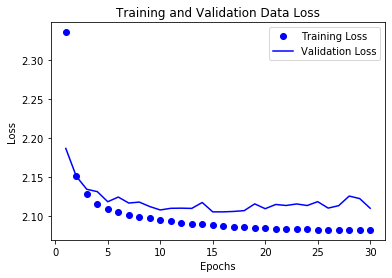

In [123]:
import matplotlib.pyplot as plt

loss= history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss) +1)

plt.plot(epochs,loss,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title('Training and Validation Data Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

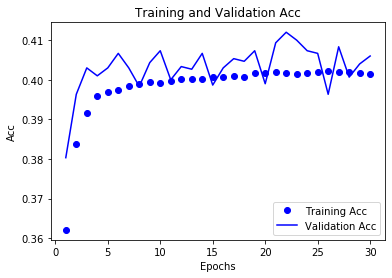

In [124]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1,len(loss) +1)

plt.plot(epochs,acc,'bo',label='Training Acc')
plt.plot(epochs,val_acc,'b',label='Validation Acc')
plt.title('Training and Validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [122]:
results = model.evaluate(test,test_labels)
results

58801/58801 [==============================] - 4s 67us/sample - loss: 2.1093 - acc: 0.3982


[2.109346579784451, 0.39822453]

In [143]:
def create_model( nl1=1, nl2=1,  nl3=1, 
                 nn1=1000, nn2=500, nn3 = 200, lr=0.01, decay=0., l1=0.01, l2=0.01,
                act = 'relu', dropout=0, input_shape=(100,), output_shape=56):
 
    opt = tf.keras.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999,  decay=decay)
    reg = tf.keras.regularizers.l1_l2(l1=l1, l2=l2)
                                                     
    model = tf.keras.models.Sequential()
    
    # for the firt layer we need to specify the input dimensions
    first=True
    
    for i in range(nl1):
        if first:
            model.add(layers.Dense(nn1, input_dim=input_shape, activation=act, kernel_regularizer=reg))
            first=False
        else: 
            model.add(layers.Dense(nn1, activation=act, kernel_regularizer=reg))
        if dropout!=0:
            model.add(tf.keras.layers.Dropout(dropout))
            
    for i in range(nl2):
        if first:
            model.add(layers.Dense(nn2, input_dim=input_shape, activation=act, kernel_regularizer=reg))
            first=False
        else: 
            model.add(layers.Dense(nn2, activation=act, kernel_regularizer=reg))
        if dropout!=0:
            model.add(tf.keras.layers.Dropout(dropout))
            
    for i in range(nl3):
        if first:
            model.add(layers.Dense(nn3, input_dim=input_shape, activation=act, kernel_regularizer=reg))
            first=False
        else: 
            model.add(layers.Dense(nn3, activation=act, kernel_regularizer=reg))
        if dropout!=0:
            model.add(tf.keras.layers.Dropout(dropout))
            
    model.add(layers.Dense(output_shape, activation='sigmoid'))
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'],)
    return model


In [153]:
model_new = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn = create_model, epochs=30,batch_size=500,verbose=1)


In [137]:
# learning algorithm parameters
lr=[1e-2, 1e-3, 1e-4]
decay=[1e-6,1e-9,0]

# activation
activation=['relu', 'sigmoid']

# numbers of layers
nl1 = [0,1,2,3]
nl2 = [0,1,2,3]
nl3 = [0,1,2,3]

# neurons in each layer
nn1=[300,700,1400, 2100,]
nn2=[100,400,800]
nn3=[50,150,300]

# dropout and regularisation
dropout = [0, 0.1, 0.2, 0.3]
l1 = [0, 0.01, 0.003, 0.001,0.0001]
l2 = [0, 0.01, 0.003, 0.001,0.0001]

# dictionary summary
param_grid = dict(
                    nl1=nl1, nl2=nl2, nl3=nl3, nn1=nn1, nn2=nn2, nn3=nn3,
                    act=activation, l1=l1, l2=l2, lr=lr, decay=decay, dropout=dropout, 
                    input_shape=(100,), output_shape = (56,),
                 )

In [140]:
from sklearn.model_selection import RandomizedSearchCV,KFold

In [154]:
grid = RandomizedSearchCV(estimator=model_new, cv=KFold(3), param_distributions=param_grid,
                         verbose=20, n_iter=10, n_jobs=1)

In [155]:
grid_result = grid.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] output_shape=56, nn3=300, nn2=800, nn1=700, nl3=1, nl2=1, nl1=2, lr=0.01, l2=0.01, l1=0.003, input_shape=100, dropout=0.2, decay=1e-09, act=relu 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/30
115601/115601 [==============================] - 3s 22us/sample - loss: 12.1372 - acc: 0.2301
Epoch 2/30
115601/115601 [==============================] - 2s 19us/sample - loss: 8.4006 - acc: 0.2312
Epoch 3/30
115601/115601 [==============================] - 2s 19us/sample - loss: 8.3912 - acc: 0.2312
Epoch 4/30
115601/115601 [==============================] - 2s 19us/sample - loss: 8.3867 - acc: 0.2312
Epoch 5/30
115601/115601 [==============================] - 2s 19us/sample - loss: 8.3802 - acc: 0.2312
Epoch 6/30
115601/115601 [==============================] - 2s 19us/sample - loss: 8.3755 - acc: 0.2312
Epoch 7/30
115601/115601 [==============================] - 2s 19us/sample - loss: 8.3807 - acc: 0.2312
Epoch 8/30
115601/115601 [==============================] - 2s 19us/sample - loss: 8.3748 - acc: 0.2312
Epoch 9/30
115601/115601 [==============================] - 2s 19us/sample - loss: 8.3744 - acc: 0.2312
Epoch 10/30
115601/115601 [==============================] - 2s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min remaining:    0.0s


Epoch 1/30
115601/115601 [==============================] - 3s 22us/sample - loss: 12.1132 - acc: 0.2320
Epoch 2/30
115601/115601 [==============================] - 2s 19us/sample - loss: 8.4002 - acc: 0.2329
Epoch 3/30
115601/115601 [==============================] - 2s 19us/sample - loss: 8.3938 - acc: 0.2329
Epoch 4/30
115601/115601 [==============================] - 2s 19us/sample - loss: 8.3910 - acc: 0.2329
Epoch 5/30
115601/115601 [==============================] - 2s 19us/sample - loss: 8.3851 - acc: 0.2329
Epoch 6/30
115601/115601 [==============================] - 2s 19us/sample - loss: 8.3829 - acc: 0.2329
Epoch 7/30
115601/115601 [==============================] - 2s 19us/sample - loss: 8.3867 - acc: 0.2329
Epoch 8/30
115601/115601 [==============================] - 2s 19us/sample - loss: 8.3815 - acc: 0.2329
Epoch 9/30
115601/115601 [==============================] - 2s 19us/sample - loss: 8.3799 - acc: 0.2329
Epoch 10/30
115601/115601 [==============================] - 2s

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.3min remaining:    0.0s


Epoch 1/30
115602/115602 [==============================] - 3s 23us/sample - loss: 12.1049 - acc: 0.2323
Epoch 2/30
115602/115602 [==============================] - 2s 19us/sample - loss: 8.3855 - acc: 0.2332
Epoch 3/30
115602/115602 [==============================] - 2s 19us/sample - loss: 8.3799 - acc: 0.2332
Epoch 4/30
115602/115602 [==============================] - 2s 19us/sample - loss: 8.3791 - acc: 0.2332
Epoch 5/30
115602/115602 [==============================] - 2s 19us/sample - loss: 8.3757 - acc: 0.2332
Epoch 6/30
115602/115602 [==============================] - 2s 19us/sample - loss: 8.3672 - acc: 0.2332
Epoch 7/30
115602/115602 [==============================] - 2s 19us/sample - loss: 8.3728 - acc: 0.2332
Epoch 8/30
115602/115602 [==============================] - 2s 19us/sample - loss: 8.3705 - acc: 0.2332
Epoch 9/30
115602/115602 [==============================] - 2s 19us/sample - loss: 8.3689 - acc: 0.2332
Epoch 10/30
115602/115602 [==============================] - 2s

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.5min remaining:    0.0s


Epoch 1/30
115601/115601 [==============================] - 2s 19us/sample - loss: 16.8304 - acc: 0.1877
Epoch 2/30
115601/115601 [==============================] - 2s 16us/sample - loss: 9.2136 - acc: 0.2312
Epoch 3/30
115601/115601 [==============================] - 2s 16us/sample - loss: 5.0263 - acc: 0.2312
Epoch 4/30
115601/115601 [==============================] - 2s 16us/sample - loss: 3.4218 - acc: 0.2312
Epoch 5/30
115601/115601 [==============================] - 2s 16us/sample - loss: 3.1058 - acc: 0.2312
Epoch 6/30
115601/115601 [==============================] - 2s 16us/sample - loss: 3.0472 - acc: 0.2312
Epoch 7/30
115601/115601 [==============================] - 2s 16us/sample - loss: 3.0145 - acc: 0.2312
Epoch 8/30
115601/115601 [==============================] - 2s 16us/sample - loss: 2.9854 - acc: 0.2312
Epoch 9/30
115601/115601 [==============================] - 2s 16us/sample - loss: 2.9554 - acc: 0.2312
Epoch 10/30
115601/115601 [==============================] - 2s

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  4.5min remaining:    0.0s


Epoch 1/30
115601/115601 [==============================] - 2s 19us/sample - loss: 16.8238 - acc: 0.2052
Epoch 2/30
115601/115601 [==============================] - 2s 16us/sample - loss: 9.2220 - acc: 0.2329
Epoch 3/30
115601/115601 [==============================] - 2s 16us/sample - loss: 5.0338 - acc: 0.2329
Epoch 4/30
115601/115601 [==============================] - 2s 16us/sample - loss: 3.4248 - acc: 0.2329
Epoch 5/30
115601/115601 [==============================] - 2s 16us/sample - loss: 3.1038 - acc: 0.2329
Epoch 6/30
115601/115601 [==============================] - 2s 16us/sample - loss: 3.0458 - acc: 0.2329
Epoch 7/30
115601/115601 [==============================] - 2s 16us/sample - loss: 3.0152 - acc: 0.2329
Epoch 8/30
115601/115601 [==============================] - 2s 16us/sample - loss: 2.9861 - acc: 0.2329
Epoch 9/30
115601/115601 [==============================] - 2s 16us/sample - loss: 2.9550 - acc: 0.2329
Epoch 10/30
115601/115601 [==============================] - 2s

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.5min remaining:    0.0s


Epoch 1/30
115602/115602 [==============================] - 2s 19us/sample - loss: 16.8640 - acc: 0.2139
Epoch 2/30
115602/115602 [==============================] - 2s 16us/sample - loss: 9.2245 - acc: 0.2332
Epoch 3/30
115602/115602 [==============================] - 2s 16us/sample - loss: 5.0314 - acc: 0.2332
Epoch 4/30
115602/115602 [==============================] - 2s 16us/sample - loss: 3.4228 - acc: 0.2332
Epoch 5/30
115602/115602 [==============================] - 2s 16us/sample - loss: 3.1055 - acc: 0.2332
Epoch 6/30
115602/115602 [==============================] - 2s 16us/sample - loss: 3.0493 - acc: 0.2332
Epoch 7/30
115602/115602 [==============================] - 2s 16us/sample - loss: 3.0161 - acc: 0.2332
Epoch 8/30
115602/115602 [==============================] - 2s 16us/sample - loss: 2.9850 - acc: 0.2332
Epoch 9/30
115602/115602 [==============================] - 2s 17us/sample - loss: 2.9517 - acc: 0.2332
Epoch 10/30
115602/115602 [==============================] - 2s

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  6.6min remaining:    0.0s


Epoch 1/30
115601/115601 [==============================] - 5s 46us/sample - loss: 157.2625 - acc: 0.1899
Epoch 2/30
115601/115601 [==============================] - 5s 40us/sample - loss: 16.3889 - acc: 0.2312
Epoch 3/30
115601/115601 [==============================] - 5s 40us/sample - loss: 16.2798 - acc: 0.2312
Epoch 4/30
115601/115601 [==============================] - 5s 40us/sample - loss: 16.2758 - acc: 0.2312
Epoch 5/30
115601/115601 [==============================] - 5s 40us/sample - loss: 16.2749 - acc: 0.2312
Epoch 6/30
115601/115601 [==============================] - 5s 40us/sample - loss: 16.2674 - acc: 0.2312
Epoch 7/30
115601/115601 [==============================] - 5s 40us/sample - loss: 16.2659 - acc: 0.2312
Epoch 8/30
115601/115601 [==============================] - 5s 40us/sample - loss: 16.2711 - acc: 0.2312
Epoch 9/30
115601/115601 [==============================] - 5s 41us/sample - loss: 16.2585 - acc: 0.2312
Epoch 10/30
115601/115601 [===========================

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  9.0min remaining:    0.0s


Epoch 1/30
115601/115601 [==============================] - 5s 47us/sample - loss: 157.2731 - acc: 0.2322
Epoch 2/30
115601/115601 [==============================] - 5s 41us/sample - loss: 16.3889 - acc: 0.2329
Epoch 3/30
115601/115601 [==============================] - 5s 41us/sample - loss: 16.2721 - acc: 0.2329
Epoch 4/30
115601/115601 [==============================] - 5s 41us/sample - loss: 16.2624 - acc: 0.2329
Epoch 5/30
115601/115601 [==============================] - 5s 41us/sample - loss: 16.2617 - acc: 0.2329
Epoch 6/30
115601/115601 [==============================] - 5s 41us/sample - loss: 16.2543 - acc: 0.2329
Epoch 7/30
115601/115601 [==============================] - 5s 41us/sample - loss: 16.2529 - acc: 0.2329
Epoch 8/30
115601/115601 [==============================] - 5s 41us/sample - loss: 16.2579 - acc: 0.2329
Epoch 9/30
115601/115601 [==============================] - 5s 41us/sample - loss: 16.2457 - acc: 0.2329
Epoch 10/30
115601/115601 [===========================

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 11.5min remaining:    0.0s


Epoch 1/30
115602/115602 [==============================] - 6s 49us/sample - loss: 157.2383 - acc: 0.2317
Epoch 2/30
115602/115602 [==============================] - 5s 42us/sample - loss: 16.3799 - acc: 0.2332
Epoch 3/30
115602/115602 [==============================] - 5s 41us/sample - loss: 16.2744 - acc: 0.2332
Epoch 4/30
115602/115602 [==============================] - 5s 41us/sample - loss: 16.2704 - acc: 0.2332
Epoch 5/30
115602/115602 [==============================] - 5s 41us/sample - loss: 16.2696 - acc: 0.2332
Epoch 6/30
115602/115602 [==============================] - 5s 41us/sample - loss: 16.2623 - acc: 0.2332
Epoch 7/30
115602/115602 [==============================] - 5s 41us/sample - loss: 16.2607 - acc: 0.2332
Epoch 8/30
115602/115602 [==============================] - 5s 42us/sample - loss: 16.2657 - acc: 0.2332
Epoch 9/30
115602/115602 [==============================] - 5s 42us/sample - loss: 16.2534 - acc: 0.2332
Epoch 10/30
115602/115602 [===========================

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 14.0min remaining:    0.0s


Epoch 1/30
115601/115601 [==============================] - 2s 20us/sample - loss: 2.6027 - acc: 0.2463
Epoch 2/30
115601/115601 [==============================] - 2s 16us/sample - loss: 2.2376 - acc: 0.3646
Epoch 3/30
115601/115601 [==============================] - 2s 16us/sample - loss: 2.1966 - acc: 0.3716
Epoch 4/30
115601/115601 [==============================] - 2s 16us/sample - loss: 2.1736 - acc: 0.3759
Epoch 5/30
115601/115601 [==============================] - 2s 16us/sample - loss: 2.1567 - acc: 0.3827
Epoch 6/30
115601/115601 [==============================] - 2s 16us/sample - loss: 2.1415 - acc: 0.3897
Epoch 7/30
115601/115601 [==============================] - 2s 16us/sample - loss: 2.1314 - acc: 0.3913
Epoch 8/30
115601/115601 [==============================] - 2s 16us/sample - loss: 2.1272 - acc: 0.3925
Epoch 9/30
115601/115601 [==============================] - 2s 16us/sample - loss: 2.1196 - acc: 0.3936
Epoch 10/30
115601/115601 [==============================] - 2s 

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 15.0min remaining:    0.0s


Epoch 1/30
115601/115601 [==============================] - 2s 20us/sample - loss: 2.5895 - acc: 0.2654
Epoch 2/30
115601/115601 [==============================] - 2s 16us/sample - loss: 2.2270 - acc: 0.3686
Epoch 3/30
115601/115601 [==============================] - 2s 16us/sample - loss: 2.1887 - acc: 0.3758
Epoch 4/30
115601/115601 [==============================] - 2s 16us/sample - loss: 2.1649 - acc: 0.3788
Epoch 5/30
115601/115601 [==============================] - 2s 16us/sample - loss: 2.1482 - acc: 0.3818
Epoch 6/30
115601/115601 [==============================] - 2s 16us/sample - loss: 2.1346 - acc: 0.3907
Epoch 7/30
115601/115601 [==============================] - 2s 16us/sample - loss: 2.1267 - acc: 0.3935
Epoch 8/30
115601/115601 [==============================] - 2s 16us/sample - loss: 2.1163 - acc: 0.3946
Epoch 9/30
115601/115601 [==============================] - 2s 16us/sample - loss: 2.1127 - acc: 0.3950
Epoch 10/30
115601/115601 [==============================] - 2s 

[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed: 16.0min remaining:    0.0s


Epoch 1/30
115602/115602 [==============================] - 2s 20us/sample - loss: 2.6088 - acc: 0.2562
Epoch 2/30
115602/115602 [==============================] - 2s 17us/sample - loss: 2.2348 - acc: 0.3673
Epoch 3/30
115602/115602 [==============================] - 2s 17us/sample - loss: 2.1951 - acc: 0.3757
Epoch 4/30
115602/115602 [==============================] - 2s 16us/sample - loss: 2.1728 - acc: 0.3787
Epoch 5/30
115602/115602 [==============================] - 2s 16us/sample - loss: 2.1535 - acc: 0.3831
Epoch 6/30
115602/115602 [==============================] - 2s 16us/sample - loss: 2.1396 - acc: 0.3935
Epoch 7/30
115602/115602 [==============================] - 2s 17us/sample - loss: 2.1311 - acc: 0.3948
Epoch 8/30
115602/115602 [==============================] - 2s 17us/sample - loss: 2.1240 - acc: 0.3955
Epoch 9/30
115602/115602 [==============================] - 2s 17us/sample - loss: 2.1159 - acc: 0.3958
Epoch 10/30
115602/115602 [==============================] - 2s 

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 17.1min remaining:    0.0s


Epoch 1/30
115601/115601 [==============================] - 2s 20us/sample - loss: 248.0197 - acc: 0.1968
Epoch 2/30
115601/115601 [==============================] - 2s 17us/sample - loss: 88.7552 - acc: 0.2312
Epoch 3/30
115601/115601 [==============================] - 2s 17us/sample - loss: 14.3578 - acc: 0.2312
Epoch 4/30
115601/115601 [==============================] - 2s 17us/sample - loss: 3.4055 - acc: 0.2312
Epoch 5/30
115601/115601 [==============================] - 2s 17us/sample - loss: 3.0732 - acc: 0.2312
Epoch 6/30
115601/115601 [==============================] - 2s 17us/sample - loss: 3.0453 - acc: 0.2312
Epoch 7/30
115601/115601 [==============================] - 2s 17us/sample - loss: 3.0261 - acc: 0.2312
Epoch 8/30
115601/115601 [==============================] - 2s 17us/sample - loss: 3.0218 - acc: 0.2312
Epoch 9/30
115601/115601 [==============================] - 2s 17us/sample - loss: 3.0209 - acc: 0.2312
Epoch 10/30
115601/115601 [==============================] -

[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed: 18.1min remaining:    0.0s


Epoch 1/30
115601/115601 [==============================] - 2s 21us/sample - loss: 248.3011 - acc: 0.2065
Epoch 2/30
115601/115601 [==============================] - 2s 17us/sample - loss: 88.8528 - acc: 0.2329
Epoch 3/30
115601/115601 [==============================] - 2s 17us/sample - loss: 14.3585 - acc: 0.2329
Epoch 4/30
115601/115601 [==============================] - 2s 17us/sample - loss: 3.4022 - acc: 0.2329
Epoch 5/30
115601/115601 [==============================] - 2s 17us/sample - loss: 3.0708 - acc: 0.2329
Epoch 6/30
115601/115601 [==============================] - 2s 17us/sample - loss: 3.0441 - acc: 0.2329
Epoch 7/30
115601/115601 [==============================] - 2s 17us/sample - loss: 3.0225 - acc: 0.2329
Epoch 8/30
115601/115601 [==============================] - 2s 17us/sample - loss: 3.0173 - acc: 0.2329
Epoch 9/30
115601/115601 [==============================] - 2s 17us/sample - loss: 3.0162 - acc: 0.2329
Epoch 10/30
115601/115601 [==============================] -

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed: 19.2min remaining:    0.0s


Epoch 1/30
115602/115602 [==============================] - ETA: 0s - loss: 250.3813 - acc: 0.200 - 2s 20us/sample - loss: 248.2686 - acc: 0.2010
Epoch 2/30
115602/115602 [==============================] - 2s 17us/sample - loss: 88.8405 - acc: 0.2332
Epoch 3/30
115602/115602 [==============================] - 2s 17us/sample - loss: 14.3521 - acc: 0.2332
Epoch 4/30
115602/115602 [==============================] - 2s 17us/sample - loss: 3.4087 - acc: 0.2332
Epoch 5/30
115602/115602 [==============================] - 2s 17us/sample - loss: 3.0735 - acc: 0.2332
Epoch 6/30
115602/115602 [==============================] - 2s 17us/sample - loss: 3.0457 - acc: 0.2332
Epoch 7/30
115602/115602 [==============================] - 2s 17us/sample - loss: 3.0249 - acc: 0.2332
Epoch 8/30
115602/115602 [==============================] - 2s 17us/sample - loss: 3.0198 - acc: 0.2332
Epoch 9/30
115602/115602 [==============================] - 2s 17us/sample - loss: 3.0188 - acc: 0.2332
Epoch 10/30
115602/1

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 20.3min remaining:    0.0s


Epoch 1/30
115601/115601 [==============================] - 3s 27us/sample - loss: 12.5089 - acc: 0.2302
Epoch 2/30
115601/115601 [==============================] - 3s 22us/sample - loss: 8.5465 - acc: 0.2312
Epoch 3/30
115601/115601 [==============================] - 3s 22us/sample - loss: 8.4966 - acc: 0.2312
Epoch 4/30
115601/115601 [==============================] - 3s 22us/sample - loss: 8.4610 - acc: 0.2312
Epoch 5/30
115601/115601 [==============================] - 3s 22us/sample - loss: 8.4263 - acc: 0.2312
Epoch 6/30
115601/115601 [==============================] - 3s 22us/sample - loss: 8.3918 - acc: 0.2312
Epoch 7/30
115601/115601 [==============================] - 3s 22us/sample - loss: 8.3639 - acc: 0.2312
Epoch 8/30
115601/115601 [==============================] - 3s 22us/sample - loss: 8.3450 - acc: 0.2312
Epoch 9/30
115601/115601 [==============================] - 3s 22us/sample - loss: 8.3166 - acc: 0.2312
Epoch 10/30
115601/115601 [==============================] - 3s

[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed: 21.7min remaining:    0.0s


Epoch 1/30
115601/115601 [==============================] - 3s 28us/sample - loss: 12.5088 - acc: 0.2320
Epoch 2/30
115601/115601 [==============================] - 3s 23us/sample - loss: 8.5499 - acc: 0.2329
Epoch 3/30
115601/115601 [==============================] - 3s 23us/sample - loss: 8.4997 - acc: 0.2329
Epoch 4/30
115601/115601 [==============================] - 3s 23us/sample - loss: 8.4656 - acc: 0.2329
Epoch 5/30
115601/115601 [==============================] - 3s 23us/sample - loss: 8.4319 - acc: 0.2329
Epoch 6/30
115601/115601 [==============================] - 3s 23us/sample - loss: 8.3967 - acc: 0.2329
Epoch 7/30
115601/115601 [==============================] - 3s 23us/sample - loss: 8.3667 - acc: 0.2329
Epoch 8/30
115601/115601 [==============================] - 3s 23us/sample - loss: 8.3478 - acc: 0.2329
Epoch 9/30
115601/115601 [==============================] - 3s 23us/sample - loss: 8.3213 - acc: 0.2329
Epoch 10/30
115601/115601 [==============================] - 3s

[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed: 23.1min remaining:    0.0s


Epoch 1/30
115602/115602 [==============================] - 3s 28us/sample - loss: 12.4914 - acc: 0.2325
Epoch 2/30
115602/115602 [==============================] - 3s 23us/sample - loss: 8.5339 - acc: 0.2332
Epoch 3/30
115602/115602 [==============================] - 3s 23us/sample - loss: 8.4830 - acc: 0.2332
Epoch 4/30
115602/115602 [==============================] - 3s 23us/sample - loss: 8.4465 - acc: 0.2332
Epoch 5/30
115602/115602 [==============================] - 3s 23us/sample - loss: 8.4137 - acc: 0.2332
Epoch 6/30
115602/115602 [==============================] - 3s 23us/sample - loss: 8.3773 - acc: 0.2332
Epoch 7/30
115602/115602 [==============================] - 3s 23us/sample - loss: 8.3493 - acc: 0.2332
Epoch 8/30
115602/115602 [==============================] - 3s 23us/sample - loss: 8.3325 - acc: 0.2332
Epoch 9/30
115602/115602 [==============================] - 3s 23us/sample - loss: 8.3044 - acc: 0.2332
Epoch 10/30
115602/115602 [==============================] - 3s

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 24.5min remaining:    0.0s


Epoch 1/30
115601/115601 [==============================] - 3s 28us/sample - loss: 19.2650 - acc: 0.2301
Epoch 2/30
115601/115601 [==============================] - 3s 24us/sample - loss: 14.3409 - acc: 0.2312
Epoch 3/30
115601/115601 [==============================] - 3s 24us/sample - loss: 14.3435 - acc: 0.2312
Epoch 4/30
115601/115601 [==============================] - 3s 23us/sample - loss: 14.3261 - acc: 0.2312
Epoch 5/30
115601/115601 [==============================] - 3s 24us/sample - loss: 14.3238 - acc: 0.2312
Epoch 6/30
115601/115601 [==============================] - 3s 24us/sample - loss: 14.3211 - acc: 0.2312
Epoch 7/30
115601/115601 [==============================] - 3s 23us/sample - loss: 14.3110 - acc: 0.2312
Epoch 8/30
115601/115601 [==============================] - 3s 23us/sample - loss: 14.3196 - acc: 0.2312
Epoch 9/30
115601/115601 [==============================] - 3s 24us/sample - loss: 14.3106 - acc: 0.2312
Epoch 10/30
115601/115601 [============================

[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed: 26.0min remaining:    0.0s


Epoch 1/30
115601/115601 [==============================] - 3s 29us/sample - loss: 19.2691 - acc: 0.2317
Epoch 2/30
115601/115601 [==============================] - 3s 24us/sample - loss: 14.3651 - acc: 0.2329
Epoch 3/30
115601/115601 [==============================] - 3s 24us/sample - loss: 14.3561 - acc: 0.2329
Epoch 4/30
115601/115601 [==============================] - 3s 24us/sample - loss: 14.3414 - acc: 0.2329
Epoch 5/30
115601/115601 [==============================] - 3s 24us/sample - loss: 14.3347 - acc: 0.2329
Epoch 6/30
115601/115601 [==============================] - 3s 24us/sample - loss: 14.3313 - acc: 0.2329
Epoch 7/30
115601/115601 [==============================] - 3s 24us/sample - loss: 14.3229 - acc: 0.2329
Epoch 8/30
115601/115601 [==============================] - 3s 24us/sample - loss: 14.3278 - acc: 0.2329
Epoch 9/30
115601/115601 [==============================] - 3s 24us/sample - loss: 14.3220 - acc: 0.2329
Epoch 10/30
115601/115601 [============================

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 43.0min finished


Epoch 1/30
173402/173402 [==============================] - 4s 21us/sample - loss: 2.4879 - acc: 0.2926
Epoch 2/30
173402/173402 [==============================] - 3s 18us/sample - loss: 2.2070 - acc: 0.3734
Epoch 3/30
173402/173402 [==============================] - 3s 18us/sample - loss: 2.1702 - acc: 0.3782
Epoch 4/30
173402/173402 [==============================] - 3s 18us/sample - loss: 2.1464 - acc: 0.3885
Epoch 5/30
173402/173402 [==============================] - 3s 18us/sample - loss: 2.1314 - acc: 0.3930
Epoch 6/30
173402/173402 [==============================] - 3s 18us/sample - loss: 2.1223 - acc: 0.3943
Epoch 7/30
173402/173402 [==============================] - 3s 18us/sample - loss: 2.1159 - acc: 0.3949
Epoch 8/30
173402/173402 [==============================] - 3s 18us/sample - loss: 2.1102 - acc: 0.3959
Epoch 9/30
173402/173402 [==============================] - 3s 18us/sample - loss: 2.1061 - acc: 0.3967
Epoch 10/30
173402/173402 [==============================] - 3s 

In [147]:
print(grid_result.best_params_)

{'output_shape': 56, 'nn3': 150, 'nn2': 800, 'nn1': 2100, 'nl3': 0, 'nl2': 0, 'nl1': 2, 'lr': 0.01, 'l2': 0.001, 'l1': 0, 'input_shape': 100, 'dropout': 0.3, 'decay': 1e-09, 'act': 'relu'}


In [148]:
best_model = grid_result.best_estimator_

In [149]:
history = best_model.fit(x_train,
                    y_train,
                    validation_data=(x_val,y_val)
                   )

Train on 173402 samples, validate on 3000 samples
Epoch 1/6
173402/173402 [==============================] - 5s 30us/sample - loss: 2.4975 - acc: 0.3179 - val_loss: 2.3485 - val_acc: 0.3777
Epoch 2/6
173402/173402 [==============================] - 4s 23us/sample - loss: 2.3404 - acc: 0.3678 - val_loss: 2.3217 - val_acc: 0.3757
Epoch 3/6
173402/173402 [==============================] - 4s 23us/sample - loss: 2.3283 - acc: 0.3682 - val_loss: 2.3054 - val_acc: 0.3820
Epoch 4/6
173402/173402 [==============================] - 4s 23us/sample - loss: 2.3168 - acc: 0.3698 - val_loss: 2.3075 - val_acc: 0.3770
Epoch 5/6
173402/173402 [==============================] - 4s 23us/sample - loss: 2.3120 - acc: 0.3697 - val_loss: 2.2926 - val_acc: 0.3820
Epoch 6/6
173402/173402 [==============================] - 4s 23us/sample - loss: 2.3072 - acc: 0.3703 - val_loss: 2.2880 - val_acc: 0.3873


In [151]:
best_model.set_params(epochs=30)

In [152]:
history = best_model.fit(x_train,
                    y_train,
                    validation_data=(x_val,y_val)
                   )

Train on 173402 samples, validate on 3000 samples
Epoch 1/30
173402/173402 [==============================] - 5s 30us/sample - loss: 2.4959 - acc: 0.3183 - val_loss: 2.3296 - val_acc: 0.3813
Epoch 2/30
173402/173402 [==============================] - 4s 23us/sample - loss: 2.3398 - acc: 0.3683 - val_loss: 2.3260 - val_acc: 0.3770
Epoch 3/30
173402/173402 [==============================] - 4s 23us/sample - loss: 2.3260 - acc: 0.3679 - val_loss: 2.3112 - val_acc: 0.3780
Epoch 4/30
173402/173402 [==============================] - 4s 23us/sample - loss: 2.3181 - acc: 0.3689 - val_loss: 2.2982 - val_acc: 0.3817
Epoch 5/30
173402/173402 [==============================] - 4s 23us/sample - loss: 2.3118 - acc: 0.3701 - val_loss: 2.2956 - val_acc: 0.3807
Epoch 6/30
173402/173402 [==============================] - 4s 23us/sample - loss: 2.3051 - acc: 0.3709 - val_loss: 2.2935 - val_acc: 0.3800
Epoch 7/30
173402/173402 [==============================] - 4s 23us/sample - loss: 2.3019 - acc: 0.3701 

In [156]:
history = model.fit(x_train,
                    y_train,
                    epochs=6,
                    batch_size=30,
                    callbacks=callbacks_list,
                    validation_data=(x_val,y_val)
                   )

Train on 173402 samples, validate on 3000 samples
Epoch 1/6
173402/173402 [==============================] - 41s 237us/sample - loss: 2.0116 - acc: 0.4143 - val_loss: 2.1567 - val_acc: 0.4030
Epoch 2/6
173402/173402 [==============================] - 41s 237us/sample - loss: 2.0116 - acc: 0.4143 - val_loss: 2.1567 - val_acc: 0.4030
Epoch 3/6
173402/173402 [==============================] - 41s 237us/sample - loss: 2.0116 - acc: 0.4143 - val_loss: 2.1567 - val_acc: 0.4030
Epoch 4/6
173402/173402 [==============================] - 41s 237us/sample - loss: 2.0116 - acc: 0.4143 - val_loss: 2.1567 - val_acc: 0.4030
Epoch 5/6
173402/173402 [==============================] - 41s 236us/sample - loss: 2.0116 - acc: 0.4143 - val_loss: 2.1567 - val_acc: 0.4030
Epoch 6/6
173402/173402 [==============================] - 41s 238us/sample - loss: 2.0116 - acc: 0.4143 - val_loss: 2.1567 - val_acc: 0.4030


In [ ]:
cat_input = tf.keras.Input(shape=(100,))
cat_layer = tf.keras.layers.Dense(128,activation='relu')(cat_input)
cat_layer2 = tf.keras.layers.Dense(64,activation='relu')(cat_layer)

num_input = tf.keras.Input(shape=(100,))
num_layer= tf.keras.layers.Dense(128,activation='relu')(num_input)
num_layer2 = tf.keras.layers.Dense(64,activation='relu')(num_layer)

